<a href="https://colab.research.google.com/github/nattrio/INT491-Capstone-Project/blob/main/61130500013_CapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INT491: Capstone Project
---
สมาชิก:
* นายจิรพัทธ์ เกลาเกลี้ยง 61130500013





## Business Understanding

### Overview

Bank Customers Churn
Source: https://www.kaggle.com/santoshd3/bank-customers

ใช้ข้อมูลที่ธนาคารทำการเก็บรวบรวมจากลูกค้า เพื่อนำมาวิเคราะห์หาว่ามีแนวโน้มที่จะยกเลิกใช้บริการจากธนาคารนี้หรือไม่

โจทย์ลักษณะนี้จัดเป็นประเภท Classification ซึ่งปัจจัยในการทำนายว่าลูกค้าจะตัดสินใจยกเลิกการใช้บริการหรือไม่นั้นมีหลายประการ

เราสามารถเอาข้อมูลนั้นมาฝึกและใช้ทำนายลูกค้าที่มีแนวโน้มจะยกเลิกบริการ ให้เรารู้ล่วงหน้าและสามารถติดต่อเสนอโปรโมชั่นเพื่อให้ลูกค้ายังคงอยู่ต่อได้

### Row

มีจำนวน 10000 แถว


### Column

มีจำนวน 14 คอลัมน์ ได้แก่

*   RowNumber (เลขแถว)
*   CustomerId (หมายเลขลูกค้า)
*   Surname (นามสกุล)
*   CreditScore (เครดิตสกอร์)
*   Geography (ภูมิภาค)
*   Gender (เพศ)
*   Age (อายุ)
*   Tenure (การครอบครอง)
*   Balance (ยอดเงิน)
*   NumOfProducts (จำนวนสินค้า)
*   HasCrCard (มีบัตรเครดิตหรือไม่)
*   IsActiveMember (เป็นสมาชิกที่เคลื่อนไหวหรือไม่)
*   EstimatedSalary (ประมาณการรายได้)
*   Exited (การยกเลิกใช้บริการ)

## Data Understanding

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nattrio/INT491-Capstone-Project/main/Churn%20Modeling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# ดูข้อมูลจำนวนหลักและแถวเบื้องต้น และ datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# ดูข้อมูลสถิติเบื้องต้นสำหรับคอลัมน์ที่เป็นตัวเลข
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### Pairplot

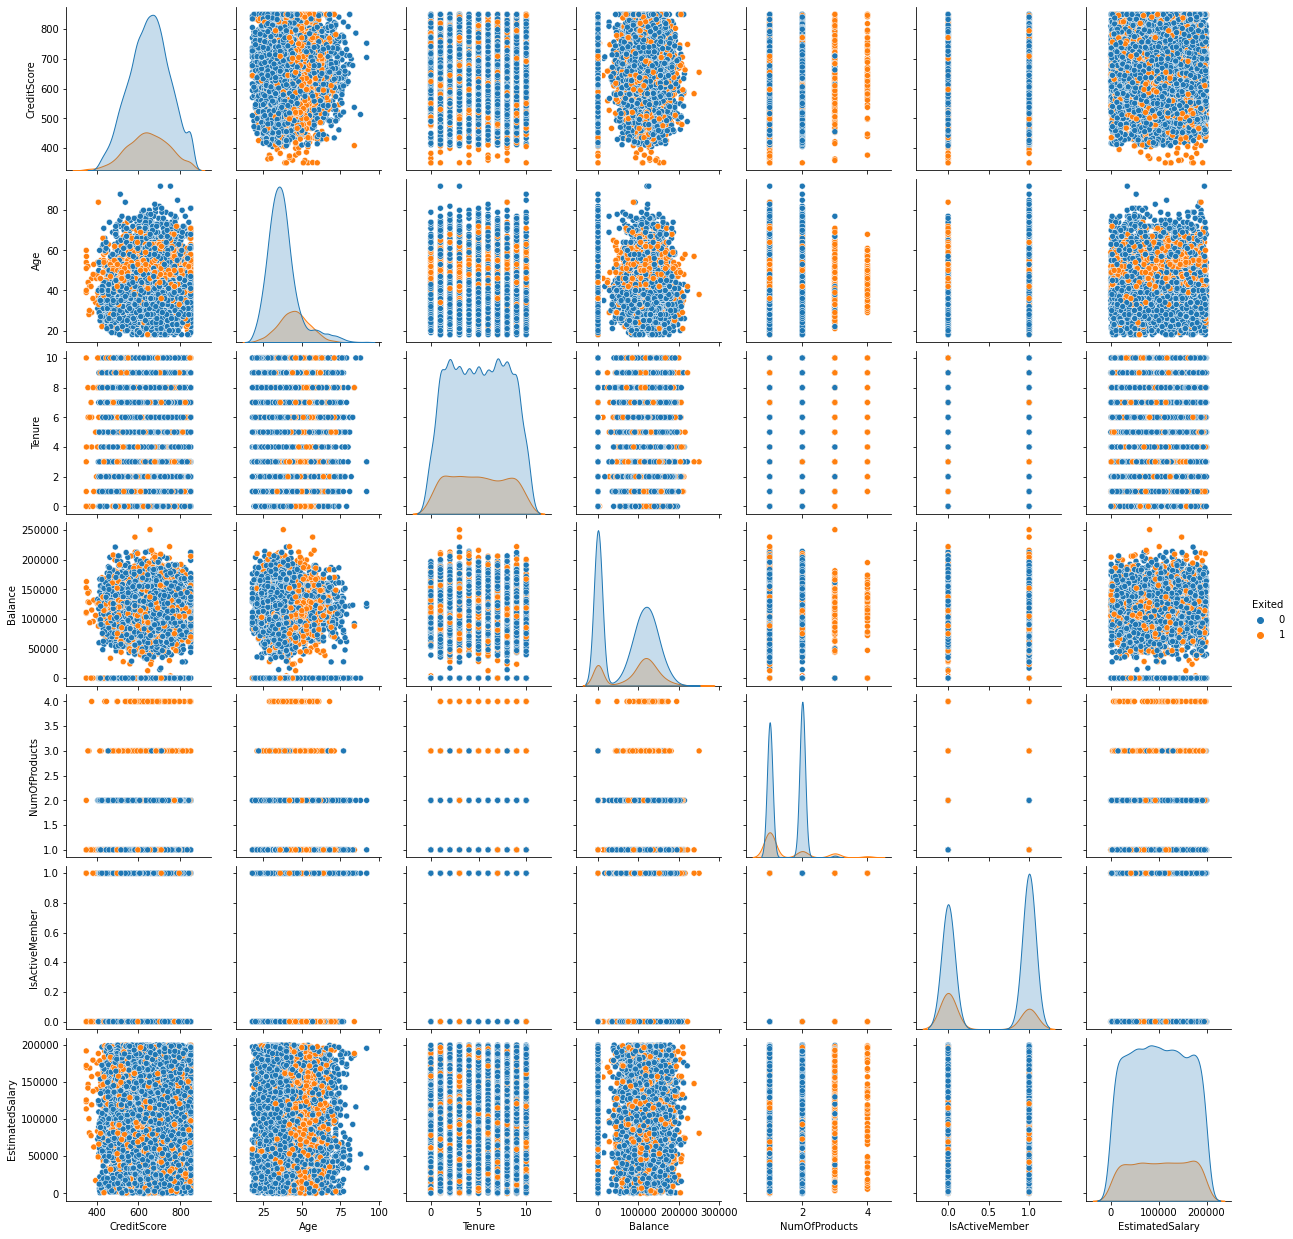

In [6]:
sns.pairplot(df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'IsActiveMember', 'EstimatedSalary', 'Exited']],hue = 'Exited')

### Number of Customer in each Geography
ดูว่าแต่ละพื้นที่มีลูกค้าใช้บริการจำนวนมากน้อยเท่าไหร่

ในที่นี้ France จะมากที่สุด คือประมาณ 50%
ส่วน Spain และ Germany มีจำนวนใกล้เคียงกัน

In [7]:
geosum = df.groupby("Geography")['Gender'].count()
geosum

Geography
France     5014
Germany    2509
Spain      2477
Name: Gender, dtype: int64

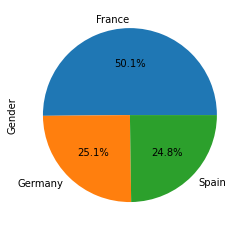

In [8]:
geosum.plot.pie(autopct="%.1f%%");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


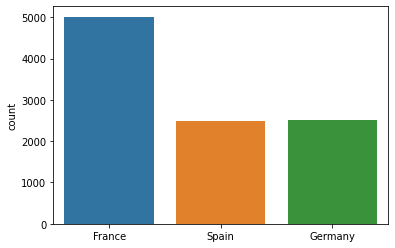

In [9]:
sns.countplot(df.Geography.values)

### Exit vs Active
หาสัดส่วนของลูกค้าที่ยังใช้บริการ กับลูกค้าตัดสินใจยกเลิก

In [10]:
exitsum = df.groupby("Exited")['Gender'].count()
exitsum

Exited
0    7963
1    2037
Name: Gender, dtype: int64

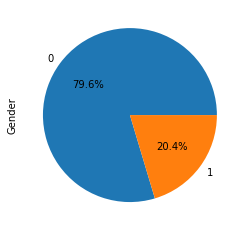

In [11]:
exitsum.plot.pie(autopct="%.1f%%");

### Age and Exit
ดูความสัมพันธ์สัดส่วนว่าเป็นผู้ใช้บริการปัจจุบันที่ยังคงอยู่ และยกเลิกบริการ ในแต่ละช่วงอายุ

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([[4.600e+01, 1.670e+02, 4.730e+02, 5.620e+02, 4.470e+02, 2.690e+02,
         5.800e+01, 1.400e+01, 1.000e+00, 0.000e+00],
        [5.650e+02, 2.012e+03, 3.156e+03, 1.309e+03, 3.810e+02, 2.540e+02,
         1.500e+02, 1.130e+02, 1.900e+01, 4.000e+00]]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <a list of 2 Lists of Patches objects>)

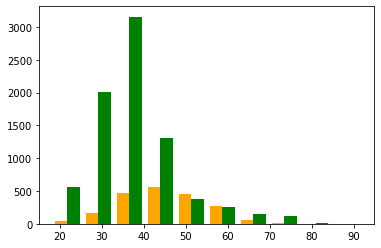

In [12]:
Age_Exit = df[df.Exited == 1].Age
Age_NoExit = df[df.Exited == 0].Age
plt.hist([Age_Exit,Age_NoExit],color=['orange','green'])

### Balance and Exit
ดูความสัมพันธ์สัดส่วนว่าเป็นผู้ใช้บริการปัจจุบันที่ยังคงอยู่ และยกเลิกบริการ ในแต่ละช่วงยอดเงินคงเหลือ

สังเกตว่ากลุ่มคนที่ใช้บริการต่อและมีมากที่สุดคือ balance 0-25000

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([[5.040e+02, 2.200e+01, 8.000e+01, 2.260e+02, 5.590e+02, 4.280e+02,
         1.560e+02, 4.300e+01, 1.700e+01, 2.000e+00],
        [3.119e+03, 4.700e+01, 2.800e+02, 9.470e+02, 1.522e+03, 1.319e+03,
         5.730e+02, 1.430e+02, 1.300e+01, 0.000e+00]]),
 array([     0.   ,  25089.809,  50179.618,  75269.427, 100359.236,
        125449.045, 150538.854, 175628.663, 200718.472, 225808.281,
        250898.09 ]),
 <a list of 2 Lists of Patches objects>)

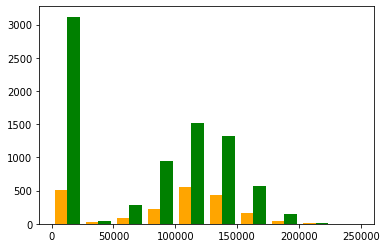

In [13]:
Balance_Exit = df[df.Exited == 1].Balance
Balance_NoExit = df[df.Exited == 0].Balance
plt.hist([Balance_Exit,Balance_NoExit],color=['orange','green'])

### Age and Balance in each Geography
plot การกระชายตัวของยอดเงินและอายุในแต่ละภูมิภาค


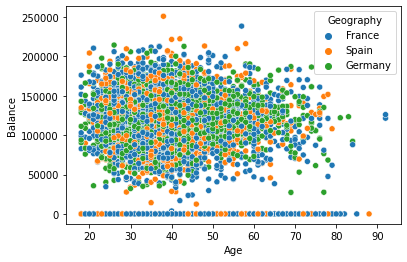

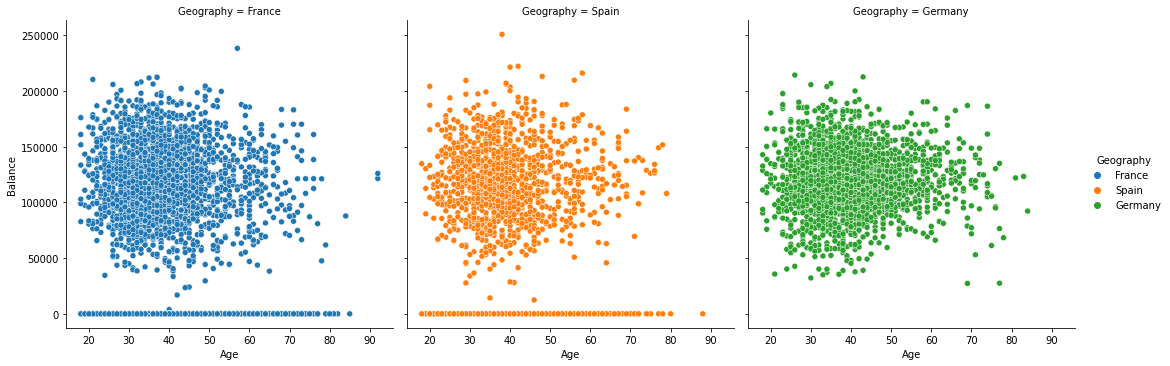

In [14]:
sns.scatterplot(data=df, x="Age", y="Balance",hue="Geography")
sns.relplot(
    data=df, x="Age", y="Balance",
    col="Geography", hue="Geography",
    kind="scatter"
)

จากที่ Plot ทำให้สังเกตได้ว่า คนในประเทศ Germany ไม่มีใครที่ยอดเงินคงเหลือเป็น 0 เลย

In [15]:
df[df["Balance"]==0].groupby("Geography")['Balance'].count()

Geography
France    2418
Spain     1199
Name: Balance, dtype: int64

### Exit in each Geography
ดูความสัมพันธ์สัดส่วนว่าเป็นผู้ใช้บริการปัจจุบันที่ยังคงอยู่ และยกเลิกบริการ ในแต่ละภูมิภาค


จะเห็นว่า France คนที่ยังคงใช้บริการมีสัดส่วนมากกว่าคนที่ยกเลิกมาก แต่ Germany คนที่ยกเลิกมีจำนวนประมาณครึ่งหนึ่งของผู้ที่ยังใช้บริการ


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([[ 810.,    0.,    0.,    0.,    0.,  413.,    0.,    0.,    0.,
          814.],
        [4204.,    0.,    0.,    0.,    0., 2064.,    0.,    0.,    0.,
         1695.]]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 2 Lists of Patches objects>)

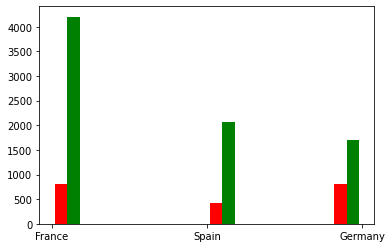

In [16]:
ES_Exit = df[df.Exited == 1].Geography
ES_NoExit = df[df.Exited == 0].Geography
plt.hist([ES_Exit,ES_NoExit],color=['red','green'])

### CreditCard and Age
ดูความสัมพันธ์สัดส่วนว่าเป็นคนที่มีบัตรเครดิตหรือไม่มี ในแต่ละช่วงอายุ

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([[4.260e+02, 1.575e+03, 2.568e+03, 1.309e+03, 5.530e+02, 3.680e+02,
         1.460e+02, 9.400e+01, 1.300e+01, 3.000e+00],
        [1.850e+02, 6.040e+02, 1.061e+03, 5.620e+02, 2.750e+02, 1.550e+02,
         6.200e+01, 3.300e+01, 7.000e+00, 1.000e+00]]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <a list of 2 Lists of Patches objects>)

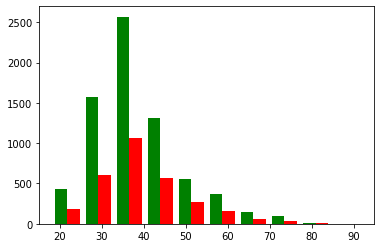

In [17]:
Age_HasCrCard = df[df.HasCrCard == 1].Age
Age_NoCrCard = df[df.HasCrCard == 0].Age
plt.hist([Age_HasCrCard,Age_NoCrCard],color=['green','red'])

### Credit Score Density
ดูการกระจายตัวและความหนาแน่นของ Credit score

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


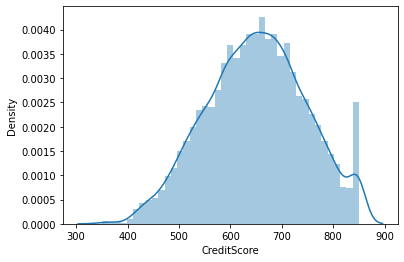

In [18]:
sns.distplot(df['CreditScore'])

## Data Preparation

### Drop Nonuse Column
เนื่องจากคอลัมน์ดังต่อไปนี้ ไม่ได้มีประโยชน์ในการใช้วิเคราะห์หรือสร้างโมเดลทำนาย จึงทำการตัดทิ้ง ได้แก่
1.   RowNumber
2.   CustomerId
3.   Surname

In [19]:
df.drop(columns=['CustomerId','Surname','RowNumber'],inplace = True)

In [20]:
# Null Checking
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Dummy variable
สร้างตัวแปร Dummy หรือ Categorical variable คือแปลงข้อมูลเชิงคุณภาพให้สามารถนำไปใช้แทนข้อมูลเชิงปริมาณ ได้แก่

*   Geography
*   Gender



In [21]:
df1 = pd.get_dummies(data = df,columns=['Geography','Gender'])
df1.sample(4)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7826,648,51,2,116574.84,1,1,0,4121.04,1,0,1,0,1,0
8528,534,35,4,0.00,2,0,0,9541.15,0,0,0,1,0,1
8324,654,55,3,87485.67,1,1,1,3299.01,0,1,0,0,0,1
4107,601,40,3,92055.36,1,0,1,164652.02,1,1,0,0,1,0


### Standardization
ลองนำข้อมูลจากคอลัมน์ที่เป็นตัวเลขมาพิจารณาดูว่า ข้อมูลต่างหน่วยมีช่วงที่ห่างกันเกินไปหรือไม่

In [22]:
from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# PCA ลองแล้วไม่ค่อยได้ผลดีขึ้นเท่าไหร่
from sklearn.pipeline import make_pipeline,Pipeline

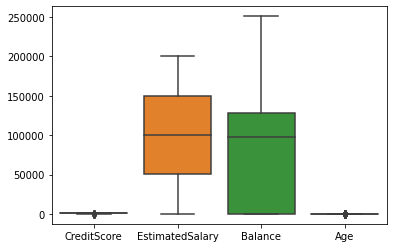

In [23]:
cols_to_scale = ['CreditScore','EstimatedSalary','Balance','Age']
sns.boxplot(data=df1[cols_to_scale])

พอพิจารณาดูแล้ว ช่วงนั้นเปรียบเทียบได้ลำบาก อาจเกิดผลต่อความแม่นยำในการทำนาย จึงลองทำการ Standardization

In [24]:
scaler = StandardScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

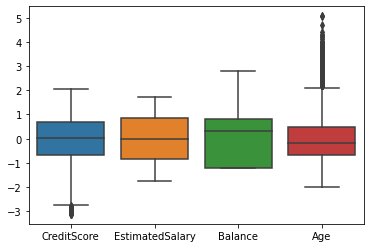

In [25]:
sns.boxplot(data=df1[cols_to_scale])

ซึ่งได้ทดลองกับ Logistic Regression Model แล้วประสิทธิภาพดีขึ้น จาก 0.78 เป็น 0.80

### Train Test Split with Imbalance Data
พบว่า Target ของข้อมูลนั้น Imbalance เพราะมีสัดส่วนของคนที่ออกกับไม่ออกไม่เท่ากัน อาจทำให้มีผลกับการฝึกโมเดลได้ จึงทำการ stratify ตัว target y ให้ยึดและแบ่งสัดส่วนให้เท่ากันทั้งตอน train, test

In [26]:
X = df1.drop(columns=['Exited'],axis = 'columns')
y = df1['Exited']

In [27]:
df.groupby("Exited")['Balance'].count()

Exited
0    7963
1    2037
Name: Balance, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [29]:
y_train[y_train==1].shape, y_train[y_train==0].shape

((1630,), (6370,))

In [30]:
y_test[y_test==1].shape, y_test[y_test==0].shape

((407,), (1593,))

## Modeling

In [31]:
from sklearn.model_selection import GridSearchCV

### SVC

In [32]:
# param_range=[1, 10, 100, 1000]
# param_grid = [
#   {'svc__C': param_range, 'svc__kernel': ['linear']},
#   {'svc__C': param_range, 'svc__gamma': param_range, 'svc__kernel': ['rbf']},
#  ]

In [33]:
from sklearn.svm import SVC
pipe_svc = Pipeline([('scale',StandardScaler()),
                    #  ('pca',PCA(n_components=2)),
                     ('svc',SVC(random_state=0))])

# gs=GridSearchCV(estimator=pipe_svc,
#                 param_grid=param_grid,
#                 scoring='accuracy',
#                 cv=5)

# gs.fit(X_train,y_train)

In [34]:
pipe_svc.fit(X_train,y_train)
y_pred = pipe_svc.predict(X_test)

### Decission Tree Classification

In [35]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=0)

In [36]:
model_dt_gs = GridSearchCV(
        estimator=model_dt, 
        param_grid= [{'criterion': ['entropy','gini']}], 
        scoring='f1_micro',
        cv=5)

In [37]:
model_dt_gs.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['entropy', 'gini']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_sc

In [38]:
model_dt_gs.best_score_

0.797875

In [39]:
model_dt_gs.best_params_

{'criterion': 'entropy'}

In [40]:
model_dt_gs.score(X_train,y_train)

1.0

### Logistic Regression Classification

In [41]:
from sklearn.linear_model import LogisticRegression
pipe_lr = Pipeline([('scale',StandardScaler()),
                    # ('pca',PCA(n_components=2)),
                    ('lr_model',LogisticRegression(random_state=0))])

In [42]:
pipe_lr.fit(X_train,y_train)
y_pred = pipe_lr.predict(X_test)

### Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()

In [44]:
model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)

### MLP

In [45]:
from sklearn.neural_network import MLPClassifier
pipe_mlp = Pipeline([('scale',StandardScaler()),
                    # ('pca',PCA(n_components=2)),
                    ('mlp_model',MLPClassifier(random_state=0))])

In [46]:
pipe_mlp.fit(X_train,y_train)
y_pred = pipe_mlp.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### Ensemble Model

In [47]:
from sklearn.ensemble import VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    # ('lr', pipe_lr),
    ('svc', pipe_svc),
    # ('dt', model_dt),
    ('mlp', pipe_mlp),
    ('rf', model_rf)
],voting='hard')

In [48]:
from sklearn.ensemble import BaggingClassifier
bagging_model = BaggingClassifier(base_estimator=pipe_lr,n_estimators=100,max_samples=0.5,max_features=2)

In [49]:
from sklearn.ensemble import AdaBoostClassifier
lr_model = LogisticRegression()
ada = AdaBoostClassifier(base_estimator=lr_model,n_estimators=100)

## Evaluation

### Cross Validation Model

In [50]:
from sklearn.model_selection import cross_val_score

model_list=[pipe_mlp,
            pipe_lr,
            pipe_svc,
            model_dt_gs,
            model_rf]

for model in model_list:
  score = cross_val_score(estimator=model,X=X_train,y=y_train,cv=10,scoring='accuracy')
  print(score.mean())


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8608750000000001
0.812125
0.8571249999999999
0.79375
0.86075


### Cross Validation Ensemble Model

In [51]:
score = cross_val_score(estimator=ensemble_model,X=X_train,y=y_train,cv=10,scoring='accuracy')
print(score.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8626250000000001


In [52]:
score = cross_val_score(estimator=bagging_model,X=X_train,y=y_train,cv=10,scoring='accuracy')
print(score.mean())

0.7962499999999999


In [53]:
score = cross_val_score(estimator=ada,X=X_train,y=y_train,cv=10,scoring='accuracy')
print(score.mean())

0.8105


### Confusion Matrix

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred,labels=[1,0])

array([[ 202,  205],
       [  79, 1514]])

### Classification Report

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1593
           1       0.72      0.50      0.59       407

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



### Summary
จากการทดลองหลายโมเดลตามที่เห็นไปก่อนหน้านี้ โมเดลที่สามารถทำนายได้มีค่า accuracy สูงที่สุดคือ random forest จึงเลือกโมเดลตัวนี้ไปใช้งาน

## Deployment

### Save and Load Model

In [56]:
from sklearn.externals import joblib
joblib.dump(model_rf,'pipeline_rf.model')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['pipeline_rf.model']

In [57]:
model_rf=joblib.load('pipeline_rf.model')

result = model_rf.predict(X_test)

(array([1757.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         243.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

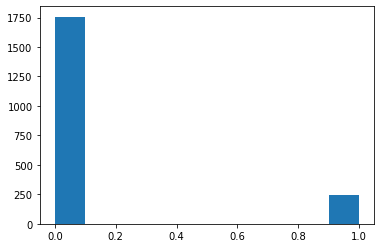

In [58]:
plt.hist(result)